In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# data checking 
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df['CustomerId'].nunique()

10000

In [12]:
#Droping unusefull data
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace = True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


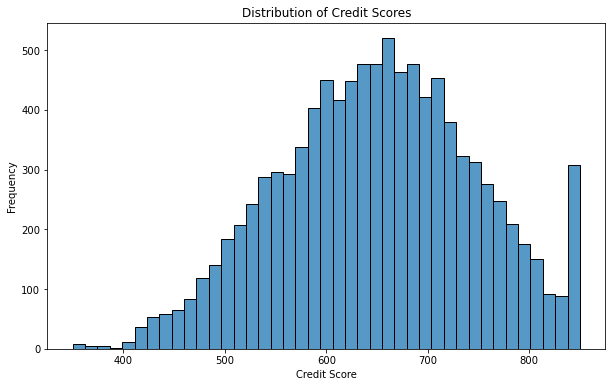

In [28]:
#Plotting graph to analyis credit score
his_lis=np.array(df['CreditScore'])
plt.figure(figsize=(10, 6))
sns.histplot(data=his_lis)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

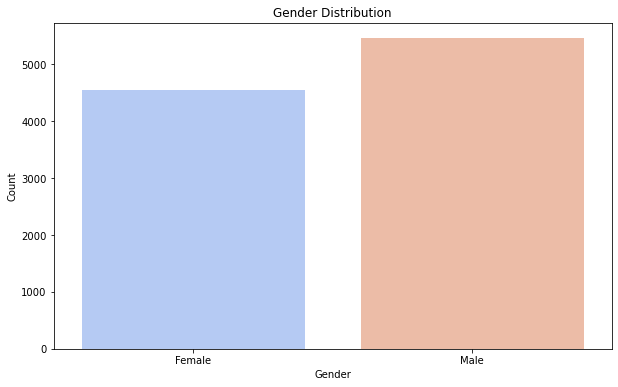

In [30]:
# Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

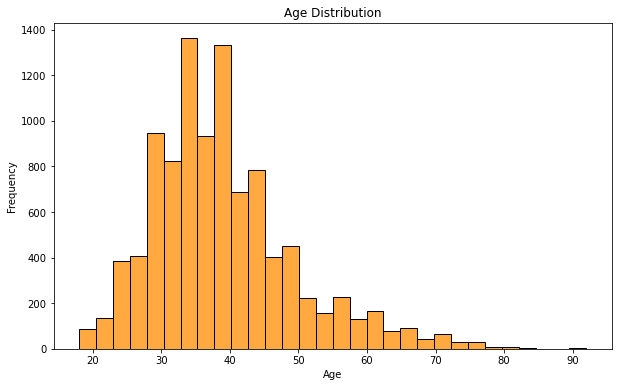

In [33]:
#Age distribution
plt.figure(figsize=(10,6))
sns.histplot(data = df,x="Age",bins = 30,color = "darkorange")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

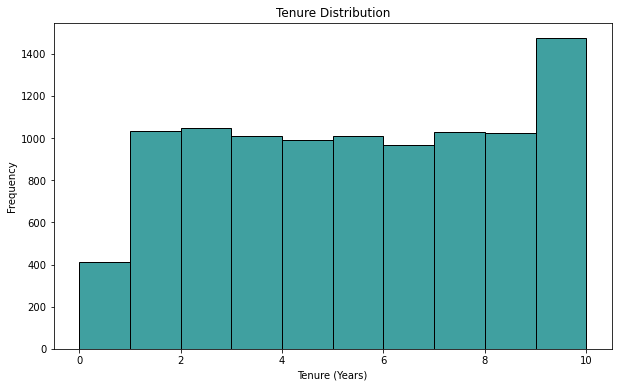

In [34]:
#Tenure based distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Tenure'], bins=10,  color='teal')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.show()

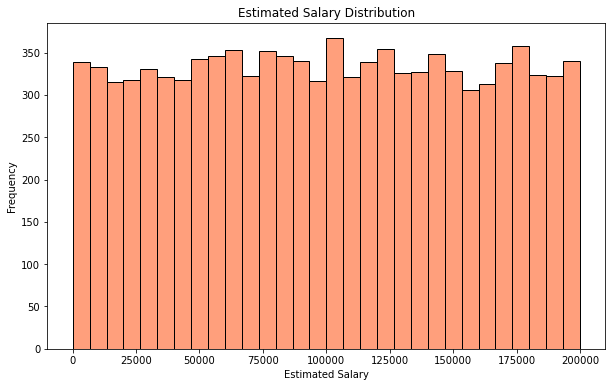

In [35]:
#Estimations
plt.figure(figsize=(10, 6))
sns.histplot(df['EstimatedSalary'], bins=30, color='coral')
plt.title('Estimated Salary Distribution')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

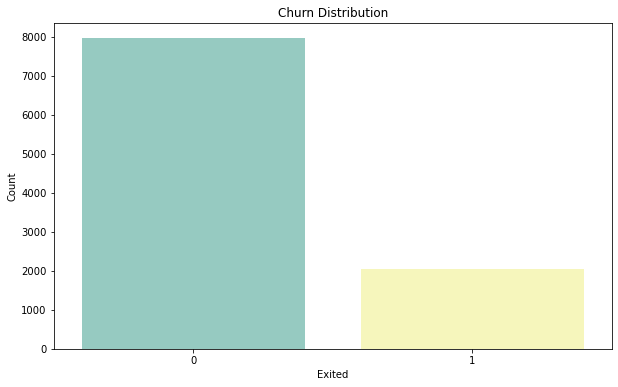

In [36]:
#Churn Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Exited', palette='Set3')
plt.title('Churn Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

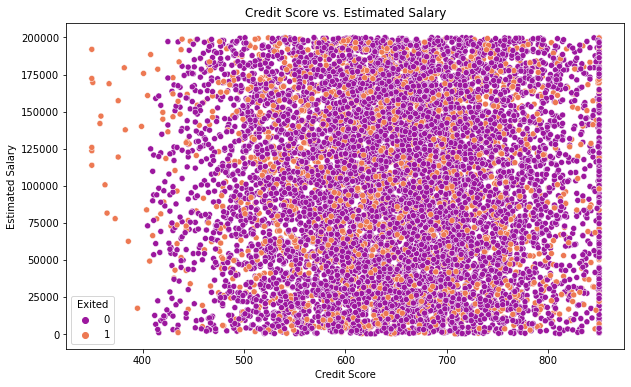

In [38]:
#Credit Score versus Estimated salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CreditScore', y='EstimatedSalary', hue='Exited', palette='plasma')
plt.title('Credit Score vs. Estimated Salary')
plt.xlabel('Credit Score')
plt.ylabel('Estimated Salary')
plt.show()

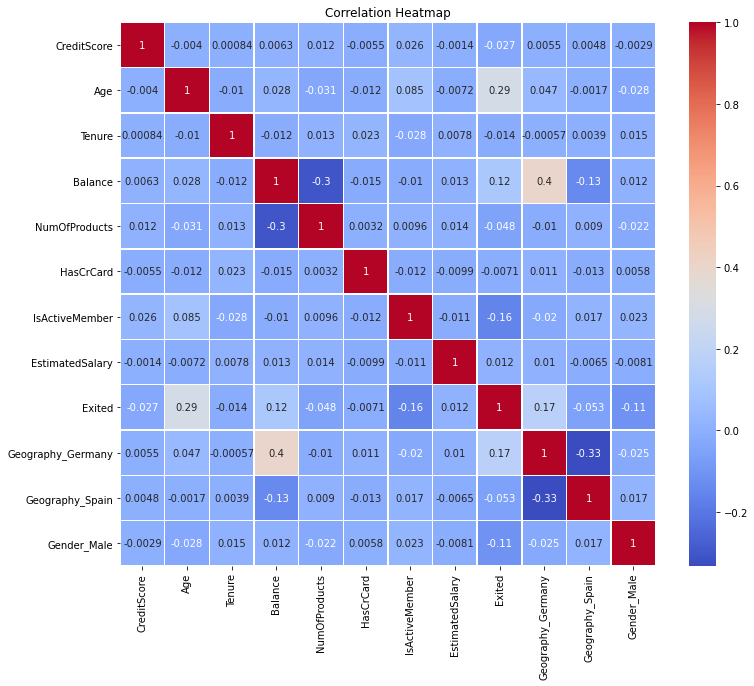

In [40]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
encoded_df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Create the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [43]:
from sklearn.svm import SVC 

In [45]:
df = pd.get_dummies(df, columns=['Geography'],dtype=int,drop_first=True)

In [46]:
input_col = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_Germany','Geography_Spain']
target_col = "Exited"

In [47]:
input_col

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_Germany',
 'Geography_Spain']

In [48]:
df["Gender"] =df["Gender"].map({"Male": 1, "Female": 0})

In [49]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [50]:
#Spliting data 
from sklearn.model_selection import train_test_split
train_df,test = train_test_split(df,test_size = 0.2,random_state=42)
train ,val = train_test_split(train_df,test_size=0.25,random_state=42)
len(train) , len(test) , len(val)

(6000, 2000, 2000)

In [52]:
train_input = train[input_col].copy()
train_target = train[target_col].copy()
test_input = test[input_col].copy()
test_target = test[target_col].copy()
val_input = val[input_col].copy()
val_target = val[target_col].copy()


In [53]:
numeric_cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Gender']
categorical_col = ['Geography_Germany','Geography_Spain']

In [55]:
scaler = StandardScaler()
scaler.fit(train_input[numeric_cols])



StandardScaler()

In [57]:
train_input[numeric_cols] = scaler.transform(train_input[numeric_cols])
test_input[numeric_cols] = scaler.transform(test_input[numeric_cols])
val_input[numeric_cols] = scaler.transform(val_input[numeric_cols])


In [58]:
X_train = train_input[numeric_cols+categorical_col]
X_val = val_input[numeric_cols+categorical_col]
X_test = test_input[numeric_cols+categorical_col]

In [62]:
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train,train_target)
y_pred= classifier.predict(val_input)  


In [64]:
train_preds = classifier.score(X_train,train_target)
val_preds = classifier.score(X_val,val_target)
test_preds = classifier.score(X_test,test_target)

In [65]:
print(f"Train Accuracy : {train_preds}")
print(f"Val Accuracy : {val_preds}")
print(f"Test Accuracy : {test_preds}")

Train Accuracy : 0.7948333333333333
Val Accuracy : 0.7935
Test Accuracy : 0.8035
